
# Smart Car_Traffic Sign Detector
# Background

As research continues in the development of self-driving cars, one of the key challenges is computer vision, allowing these cars to develop an understanding of their environment from digital images. In particular, this involves the ability to recognize and distinguish road signs – stop signs, speed limit signs, yield signs, and more.

In this project, you’ll use TensorFlow to build a neural network to classify road signs based on an image of those signs. To do so, you’ll need a labeled dataset: a collection of images that have already been categorized by the road sign represented in them.

Several such data sets exist, but for this project, we’ll use the German Traffic Sign Recognition Benchmark (GTSRB) dataset, which contains thousands of images of 43 different kinds of road signs.
# Load Data 

In [88]:
import cv2
import numpy as np
import os
import sys
import tensorflow as tf
import glob

from sklearn.model_selection import train_test_split
EPOCHS = 10
IMG_WIDTH = 30
IMG_HEIGHT = 30
NUM_CATEGORIES = 43
TEST_SIZE = 0.4
def load_data(data_dir):
    """
    Load image data from directory `data_dir`.

    Assume `data_dir` has one directory named after each category, numbered
    0 through NUM_CATEGORIES - 1. Inside each category directory will be some
    number of image files.

    Return tuple `(images, labels)`. `images` should be a list of all
    of the images in the data directory, where each image is formatted as a
    numpy ndarray with dimensions IMG_WIDTH x IMG_HEIGHT x 3. `labels` should
    be a list of integer labels, representing the categories for each of the
    corresponding `images`.
    """
    files = os.listdir(data_dir)
    images = []
    labels = []
    for file in files:
        path = os.path.join(data_dir, file)
        image_names = os.listdir(path)
        label = int(file)
        for image_name in image_names:
            image = cv2.imread(os.path.join(path, image_name)) / 255.0
            image = cv2.resize(image, (IMG_WIDTH, IMG_HEIGHT))
            images.append(image)
            labels.append(label)
    
    return images, labels
 # Get image arrays and labels for all image files
images, labels = load_data('C:/Users/rzouga/Downloads/harvard/gtsrb/gtsrb')

 # Split data into training and testing sets

In [89]:
 # Split data into training and testing sets
labels = tf.keras.utils.to_categorical(labels)
x_train, x_test, y_train, y_test = train_test_split(np.array(images), np.array(labels), test_size=TEST_SIZE)


# Dataset Summary & Exploration

In [90]:
# Number of training examples
n_train = x_train.shape[0]

# Number of testing examples.
n_test = x_test.shape[0]
# What's the shape of an traffic sign image?
image_shape = x_train[0].shape
# Unique classes/labels there are in the dataset.
classes, class_indices, class_counts  = np.unique(y_train, return_index=True, return_counts=True)
n_classes = len(class_counts)


print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 15984
Number of testing examples = 10656
Image data shape = (30, 30, 3)
Number of classes = 2



# Histogram of class distrubtions across data set splits

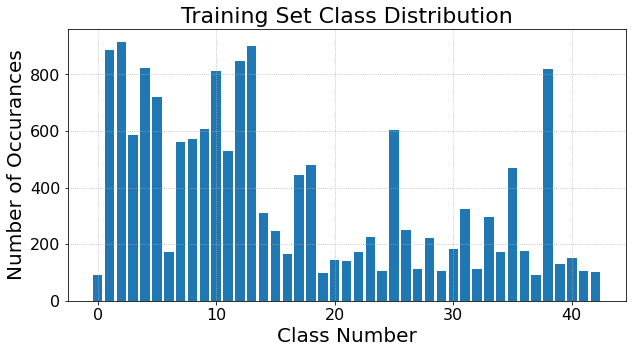

In [83]:
# Visualizations will be shown in the notebook.
%matplotlib inline
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.figure(0, figsize = (10,5))
unique_train, counts_train = np.unique(y_train, return_counts = True)
plt.bar(unique_train, counts_train)

plt.title('Training Set Class Distribution', fontsize=22)
plt.xlabel('Class Number', fontsize=20)
plt.ylabel('Number of Occurances', fontsize=20)
plt.tick_params(labelsize=16)
plt.grid(linestyle=':')

0 . Class : 


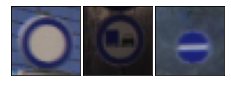

1 . Class : 


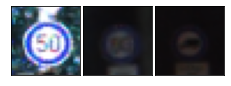

2 . Class : 


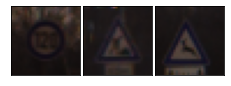

3 . Class : 


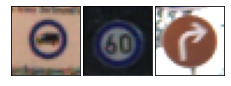

4 . Class : 


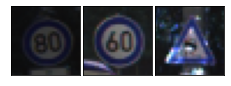

5 . Class : 


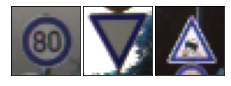

6 . Class : 


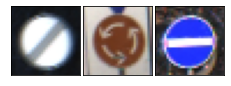

7 . Class : 


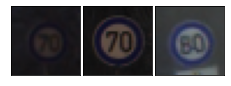

8 . Class : 


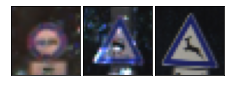

9 . Class : 


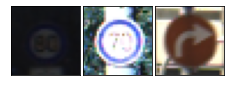

10 . Class : 


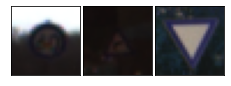

11 . Class : 


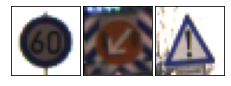

12 . Class : 


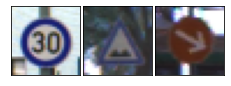

13 . Class : 


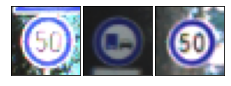

14 . Class : 


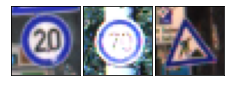

15 . Class : 


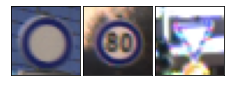

16 . Class : 


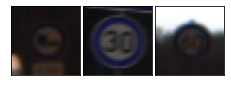

17 . Class : 


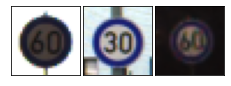

18 . Class : 


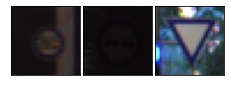

19 . Class : 


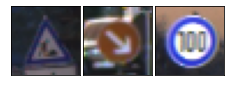

20 . Class : 


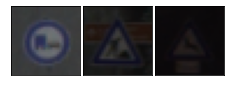

21 . Class : 


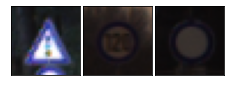

22 . Class : 


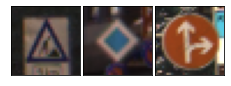

23 . Class : 


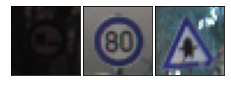

24 . Class : 


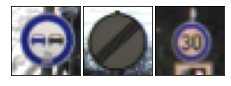

25 . Class : 


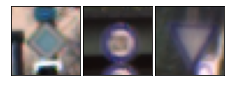

26 . Class : 


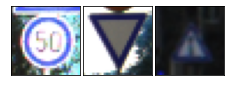

27 . Class : 


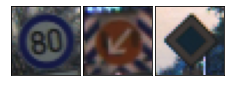

28 . Class : 


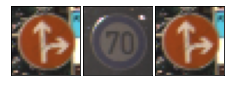

29 . Class : 


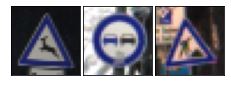

30 . Class : 


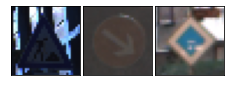

31 . Class : 


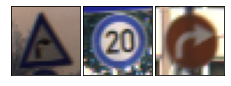

32 . Class : 


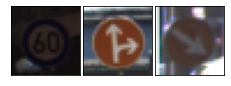

33 . Class : 


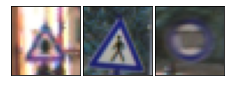

34 . Class : 


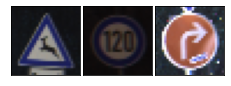

35 . Class : 


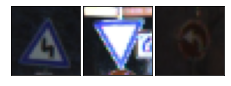

36 . Class : 


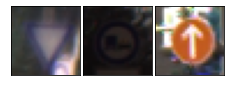

37 . Class : 


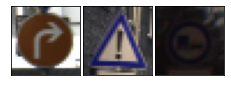

38 . Class : 


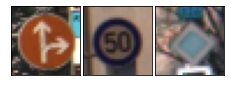

39 . Class : 


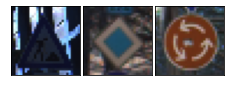

40 . Class : 


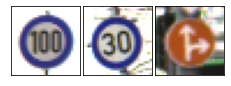

41 . Class : 


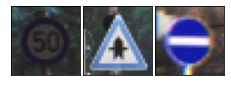

42 . Class : 


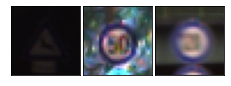

In [84]:
# Visualise all Images Classes
for c, c_i, c_count in zip(classes, class_indices, class_counts):
    print(c, ". Class : " )
    fig = pyplot.figure(figsize = (10, 1))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    for i in range(3):
        axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        random_indices = np.random.randint(c_i, c_i+c_count, 10)
        axis.imshow(x_train[random_indices[i],:,:,:])
        #axis.text(0, 0, '{}: {}'.format(c, sign_names[c]), color='k',backgroundcolor='c', fontsize=8)
        
    pyplot.show()

In [91]:
def get_model():
    """
    Returns a compiled convolutional neural network model. Assume that the
    `input_shape` of the first layer is `(IMG_WIDTH, IMG_HEIGHT, 3)`.
    The output layer should have `NUM_CATEGORIES` units, one for each category.
    """
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(
            32, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)
            ),
        
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dropout(0.5),
        
        tf.keras.layers.Dense(NUM_CATEGORIES, activation="softmax")
        ])
    
    model.compile(
        optimizer="adam",
        loss="categorical_crossentropy",
        metrics=["accuracy"]
        )
    
    return model 

# Fit_Evaluate

In [93]:
# Get a compiled neural network
model = get_model()

# Fit model on training data
model.fit(x_train, y_train, epochs=EPOCHS)

# Evaluate neural network performance
model.evaluate(x_test,  y_test, verbose=2)



Train on 15984 samples
Epoch 1/10
15984/15984 [==============================] - ETA: 0s - loss: 2.4640 - accuracy: 0.33 - 59s 4ms/sample - loss: 2.4629 - accuracy: 0.3390
Epoch 2/10
15984/15984 [==============================] - 53s 3ms/sample - loss: 1.3247 - accuracy: 0.5999
Epoch 3/10
15984/15984 [==============================] - 55s 3ms/sample - loss: 0.9510 - accuracy: 0.7060
Epoch 4/10
15984/15984 [==============================] - 54s 3ms/sample - loss: 0.7688 - accuracy: 0.7552
Epoch 5/10
15984/15984 [==============================] - 53s 3ms/sample - loss: 0.6730 - accuracy: 0.7780
Epoch 6/10
15984/15984 [==============================] - 51s 3ms/sample - loss: 0.5993 - accuracy: 0.8062
Epoch 7/10
15984/15984 [==============================] - 54s 3ms/sample - loss: 0.5374 - accuracy: 0.8228
Epoch 8/10
15984/15984 [==============================] - 56s 3ms/sample - loss: 0.5123 - accuracy: 0.8334
Epoch 9/10
15984/15984 [==============================] - 58s 4ms/sample - loss

[0.17071131322331526, 0.9603041]